In [90]:
# Setting the working directory
import os

In [9]:
# Suppress Warning messages
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [11]:
# Importing relevant libraries
import scorecardpy as sc
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from sklearn.linear_model import LinearRegression
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [19]:
# read dataset
curr_dir = os.getcwd()
df_bs = pd.read_csv(curr_dir+'\\Bike-Sharing-Dataset\\hour.csv')
df_bs.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [20]:
df_bs.shape

(17379, 17)

In [22]:
#rename data columns
df_bs.rename(columns={'instant':'id',
                          'dteday':'datetime',
                          'holiday':'holiday_ind',
                          'workingday':'workingday_ind',
                          'weathersit':'weather_con',
                          'hum':'humidity',
                          'mnth':'month',
                          'cnt':'total_count',
                          'hr':'hour',
                          'yr':'year',                     
                     }, inplace=True)

In [23]:
df_bs.head(10)

,id,datetime,season,year,month,hour,holiday_ind,weekday,workingday_ind,weather_con,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


In [31]:
# check for missing values
df_bs.isnull().values.any()
df_bs.isnull().sum()

id                0
datetime          0
season            0
year              0
month             0
hour              0
holiday_ind       0
weekday           0
workingday_ind    0
weather_con       0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
total_count       0
dtype: int64

In [24]:
df_bs.dtypes

id                  int64
datetime           object
season              int64
year                int64
month               int64
hour                int64
holiday_ind         int64
weekday             int64
workingday_ind      int64
weather_con         int64
temp              float64
atemp             float64
humidity          float64
windspeed         float64
casual              int64
registered          int64
total_count         int64
dtype: object

In [25]:
# date time conversion
df_bs['datetime'] = pd.to_datetime(df_bs.datetime)
#categorical variables
df_bs['season'] = df_bs.season.astype('category')
df_bs['holiday_ind'] = df_bs.holiday_ind.astype('category')
df_bs['weekday'] = df_bs.weekday.astype('category')
df_bs['weather_con'] = df_bs.weather_con.astype('category')
df_bs['workingday_ind'] = df_bs.workingday_ind.astype('category')
df_bs['month'] = df_bs.month.astype('category')
df_bs['year'] = df_bs.year.astype('category')
df_bs['hour'] = df_bs.hour.astype('category')

In [26]:
df_bs.dtypes

id                         int64
datetime          datetime64[ns]
season                  category
year                    category
month                   category
hour                    category
holiday_ind             category
weekday                 category
workingday_ind          category
weather_con             category
temp                     float64
atemp                    float64
humidity                 float64
windspeed                float64
casual                     int64
registered                 int64
total_count                int64
dtype: object

In [32]:
# convert the categorical features
# creating dummies for all these variables
d_season = pd.get_dummies(df_bs['season'], prefix='season')
d_hol_i = pd.get_dummies(df_bs['holiday_ind'], prefix='hol')
d_wkd = pd.get_dummies(df_bs['weekday'], prefix='weekday')
d_w_con = pd.get_dummies(df_bs['weather_con'], prefix='w_con')
d_wd_i = pd.get_dummies(df_bs['workingday_ind'], prefix='wd_i')
d_mon = pd.get_dummies(df_bs['month'], prefix='mon')
d_yr = pd.get_dummies(df_bs['year'], prefix='yr')
d_hr = pd.get_dummies(df_bs['hour'], prefix='hour')

mu = 189.46 and sigma = 181.38


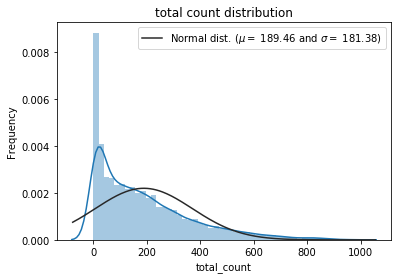

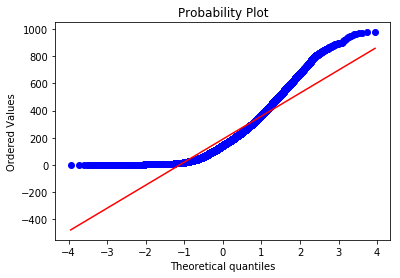

In [34]:
# Test - Distribution of Dep Var
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(df_bs['total_count'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df_bs['total_count'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

# Plotting distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('total count distribution')

# QQ plot
fig = plt.figure()
res = stats.probplot(df_bs['total_count'], plot=plt)
plt.show()

Text(0, 0.5, 'Freq')

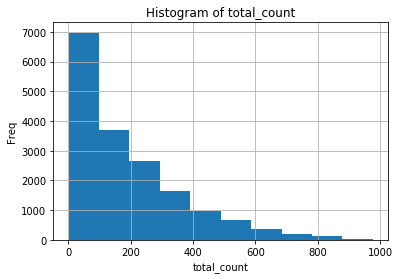

In [35]:
# An alternative view
df_bs.total_count.hist()
plt.title('Histogram of total_count')
plt.xlabel('total_count')
plt.ylabel('Freq')

mu = 4.57 and sigma = 1.42


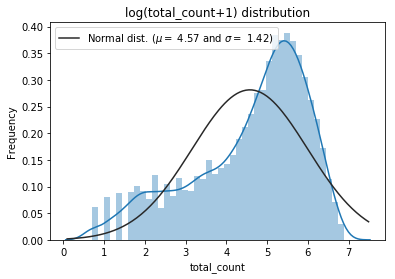

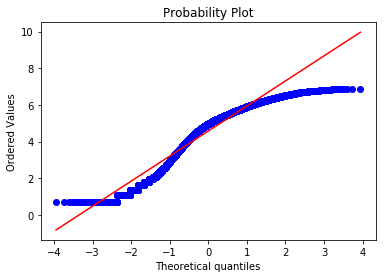

In [41]:
# Log transformation of the dep variable
sns.distplot(np.log1p(df_bs['total_count']), fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(np.log1p(df_bs['total_count']))
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))

# Plotting distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('log(total_count+1) distribution')

# QQ plot
fig = plt.figure()
res = stats.probplot(np.log1p(df_bs['total_count']), plot=plt)
plt.show()


In [42]:
df_bs.describe()

,id,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


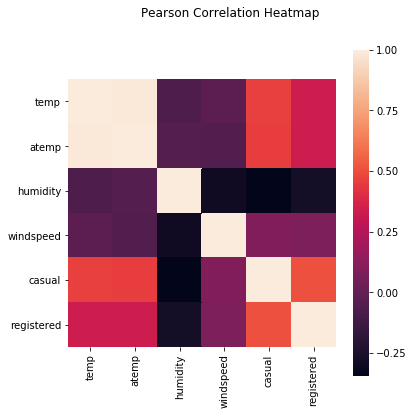

In [43]:
# Check for correlation with the numeric features
df_bs_nid = df_bs.drop(['id'], axis=1)
pd.set_option('precision', 2)
plt.figure(figsize=(6,6))
sns.heatmap(df_bs_nid.drop(['total_count'], axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show()

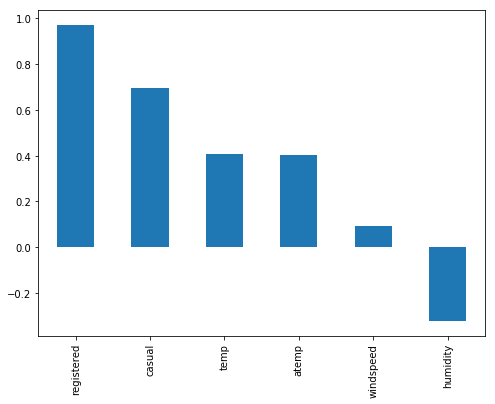

In [44]:
corr_with_tot_count = df_bs_nid.corr()["total_count"].sort_values(ascending=False)
plt.figure(figsize=(8,6))
corr_with_tot_count.drop("total_count").plot.bar()
plt.show()

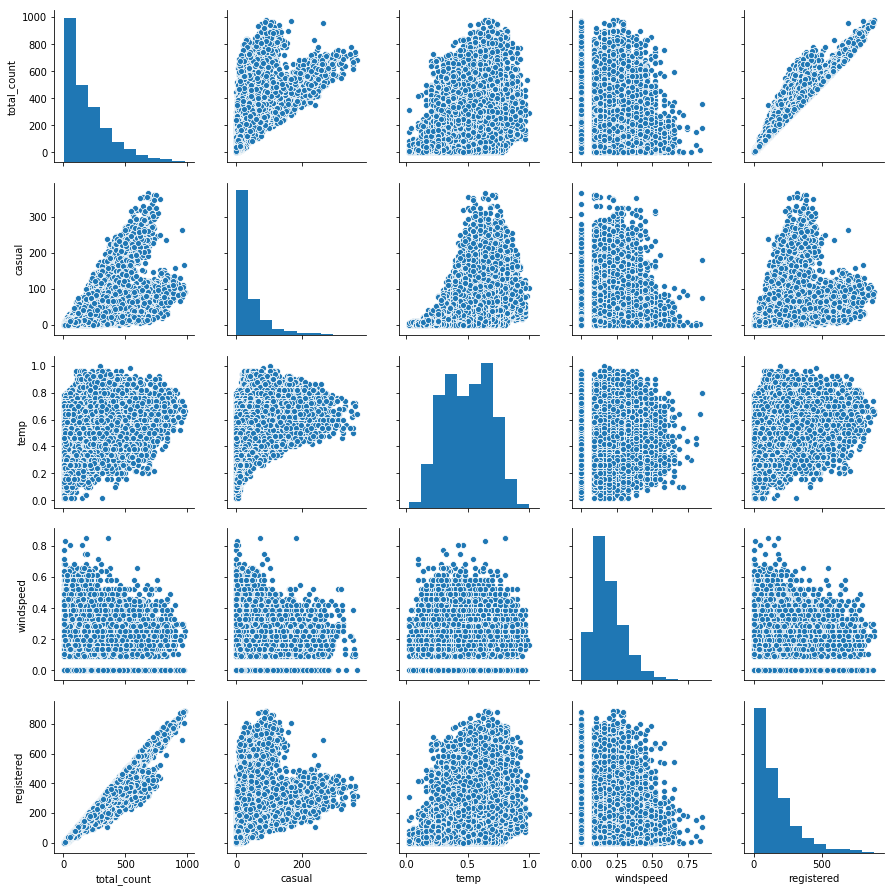

In [45]:
sns.pairplot(df_bs_nid[['total_count', 'casual', 'temp', 'windspeed', 'registered']])
plt.show()

In [46]:
# Create the final dataset with all the relevant features - both dependant and predictors
feature_x_cont = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered']
df_bs_cont = df_bs[feature_x_cont]

df_bs_new = pd.concat([d_season, d_hol_i, d_wkd, d_w_con, d_wd_i, d_mon, d_yr, d_hr, df_bs_cont, df_bs['total_count']], axis=1)

In [47]:
df_bs_new.shape

(17379, 64)

In [48]:
df_bs_new.head(10)

,season_1,season_2,season_3,season_4,hol_0,hol_1,weekday_0,weekday_1,weekday_2,weekday_3,...,hour_21,hour_22,hour_23,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.81,0.00,3,13,16
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.22,0.27,0.80,0.00,8,32,40
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.22,0.27,0.80,0.00,5,27,32
3,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.75,0.00,3,10,13
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.75,0.00,0,1,1
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.26,0.75,0.09,0,1,1
6,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.22,0.27,0.80,0.00,2,0,2
7,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.20,0.26,0.86,0.00,1,2,3
8,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.24,0.29,0.75,0.00,1,7,8
9,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0.32,0.35,0.76,0.00,8,6,14


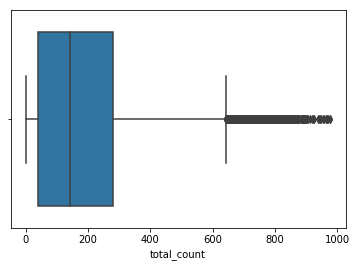

In [49]:
# Finding outliers
# Box plot
import seaborn as sns
sns.boxplot(x=df_bs['total_count'])

In [50]:
df_bs_new.describe()

,season_1,season_2,season_3,season_4,hol_0,hol_1,weekday_0,weekday_1,weekday_2,weekday_3,...,hour_21,hour_22,hour_23,temp,atemp,humidity,windspeed,casual,registered,total_count
count,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,...,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00,17379.00
mean,0.24,0.25,0.26,0.24,0.97,0.03,0.14,0.14,0.14,0.14,...,0.04,0.04,0.04,0.50,0.48,0.63,0.19,35.68,153.79,189.46
std,0.43,0.44,0.44,0.43,0.17,0.17,0.35,0.35,0.35,0.35,...,0.20,0.20,0.20,0.19,0.17,0.19,0.12,49.31,151.36,181.39
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,1.00
25%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.34,0.33,0.48,0.10,4.00,34.00,40.00
50%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.50,0.48,0.63,0.19,17.00,115.00,142.00
75%,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.66,0.62,0.78,0.25,48.00,220.00,281.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,0.85,367.00,886.00,977.00


In [51]:
#Feature Selection - Regularization

Y_bs_data = df_bs_new['total_count']
X_bs_data = df_bs_new.drop(['total_count'],axis=1)

In [52]:
print(Y_bs_data.shape)
print(X_bs_data.shape)

(17379,)
(17379, 63)


In [53]:
X_colnames_u = [cols for cols in df_bs_new.columns.tolist() if cols not in [
'total_count'
]]
X_colnames_u

['season_1',
 'season_2',
 'season_3',
 'season_4',
 'hol_0',
 'hol_1',
 'weekday_0',
 'weekday_1',
 'weekday_2',
 'weekday_3',
 'weekday_4',
 'weekday_5',
 'weekday_6',
 'w_con_1',
 'w_con_2',
 'w_con_3',
 'w_con_4',
 'wd_i_0',
 'wd_i_1',
 'mon_1',
 'mon_2',
 'mon_3',
 'mon_4',
 'mon_5',
 'mon_6',
 'mon_7',
 'mon_8',
 'mon_9',
 'mon_10',
 'mon_11',
 'mon_12',
 'yr_0',
 'yr_1',
 'hour_0',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered']

In [54]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(X_bs_data,Y_bs_data,train_size = 0.7,random_state=3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [55]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12165, 63)
(5214, 63)
(12165,)
(5214,)


In [56]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNetCV
cv_model = ElasticNetCV(l1_ratio=[.1,.2,.3,.4, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, 
                        fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=10, 
                        copy_X=True, verbose=0, positive=False, random_state=0)
               
cv_model.fit(x_train, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00160287
Optimal l1_ratio: 1.000
Number of iterations 18


In [57]:
import time
from datetime import datetime
def log_msg(message):
    print(str(datetime.now()) + ": " + message)

log_msg("Started running LR for feature selection...")
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LinearRegression,ElasticNet,RandomizedLasso
# from sklearn.feature_selection import RFE
 
# lr1 = ElasticNet(alpha='0.00160287', l1_ratio=1.0)
lr1 = LinearRegression()
rfe = RFE(estimator=lr1, n_features_to_select=30, step=1)
rfe.fit(x_train, y_train)

log_msg("Completed running LR for feature selection...")

2019-07-19 20:46:33.888782: Started running LR for feature selection...
2019-07-19 20:46:35.690056: Completed running LR for feature selection...


In [58]:
select_features_rfe = rfe.get_support()
feature_names_rfe = x_train.columns[select_features_rfe]
print(feature_names_rfe)
set(feature_names_rfe)

Index(['w_con_1', 'w_con_2', 'w_con_3', 'w_con_4', 'wd_i_0', 'wd_i_1',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_14',
       'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20',
       'hour_21', 'hour_22', 'hour_23', 'casual', 'registered'],
      dtype='object')


{'casual',
 'hour_1',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_2',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'registered',
 'w_con_1',
 'w_con_2',
 'w_con_3',
 'w_con_4',
 'wd_i_0',
 'wd_i_1'}

In [59]:
# Apply RandomisedLasso
lasso = RandomizedLasso(alpha=0.00160287)
lasso.fit(x_train, y_train)

RandomizedLasso(alpha=0.00160287, eps=2.220446049250313e-16,
        fit_intercept=True, max_iter=500, memory=None, n_jobs=None,
        n_resampling=200, normalize=True, pre_dispatch='3*n_jobs',
        precompute='auto', random_state=None, sample_fraction=0.75,
        scaling=0.5, selection_threshold=0.25, verbose=False)

In [60]:
print ("Features sorted by their score:")
print (sorted(zip(map(lambda x: round(x, 4), lasso.scores_), 
                  X_bs_data.columns), reverse=True))

Features sorted by their score:
[(1.0, 'registered'), (1.0, 'casual'), (0.145, 'temp'), (0.105, 'atemp'), (0.0, 'yr_1'), (0.0, 'yr_0'), (0.0, 'windspeed'), (0.0, 'weekday_6'), (0.0, 'weekday_5'), (0.0, 'weekday_4'), (0.0, 'weekday_3'), (0.0, 'weekday_2'), (0.0, 'weekday_1'), (0.0, 'weekday_0'), (0.0, 'wd_i_1'), (0.0, 'wd_i_0'), (0.0, 'w_con_4'), (0.0, 'w_con_3'), (0.0, 'w_con_2'), (0.0, 'w_con_1'), (0.0, 'season_4'), (0.0, 'season_3'), (0.0, 'season_2'), (0.0, 'season_1'), (0.0, 'mon_9'), (0.0, 'mon_8'), (0.0, 'mon_7'), (0.0, 'mon_6'), (0.0, 'mon_5'), (0.0, 'mon_4'), (0.0, 'mon_3'), (0.0, 'mon_2'), (0.0, 'mon_12'), (0.0, 'mon_11'), (0.0, 'mon_10'), (0.0, 'mon_1'), (0.0, 'humidity'), (0.0, 'hour_9'), (0.0, 'hour_8'), (0.0, 'hour_7'), (0.0, 'hour_6'), (0.0, 'hour_5'), (0.0, 'hour_4'), (0.0, 'hour_3'), (0.0, 'hour_23'), (0.0, 'hour_22'), (0.0, 'hour_21'), (0.0, 'hour_20'), (0.0, 'hour_2'), (0.0, 'hour_19'), (0.0, 'hour_18'), (0.0, 'hour_17'), (0.0, 'hour_16'), (0.0, 'hour_15'), (0.0, 'hou

In [62]:
# Final Features
cols=['casual',
 'hour_0',
 'hour_1',
 'hour_13',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_2',
 'hour_23',
 'humidity',
 'mon_1',
 'mon_10',
 'mon_11',
 'mon_2',
 'mon_3',
 'mon_4',
 'mon_5',
 'mon_6',
 'mon_7',
 'mon_8',
 'registered',
 'season_3',
 'season_4',
 'temp',
 'w_con_4',
 'wd_i_1',
 'weekday_0',
 'weekday_2',
 'windspeed',
 'yr_1'] 
x_new_f=df_bs_new[cols]
y_new_f=df_bs_new['total_count']

In [63]:
print(x_new_f.shape)
print(y_new_f.shape)

(17379, 30)
(17379,)


In [64]:
# Creating Training and Test data
x_train,x_test,y_train,y_test = train_test_split(x_new_f,y_new_f,train_size = 0.7,random_state=4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [65]:
x_train.head()

,casual,hour_0,hour_1,hour_13,hour_17,hour_18,hour_19,hour_2,hour_23,humidity,...,registered,season_3,season_4,temp,w_con_4,wd_i_1,weekday_0,weekday_2,windspeed,yr_1
13590,79,0,0,0,0,0,0,0,0,0.33,...,202,1,0,0.76,0,1,0,0,0.00,1
1823,41,0,0,0,1,0,0,0,0,0.64,...,231,0,0,0.54,0,1,0,0,0.25,0
14404,44,0,0,0,0,0,0,0,0,0.79,...,351,1,0,0.70,0,1,0,1,0.16,1
9900,15,0,0,1,0,0,0,0,0,0.54,...,175,0,0,0.42,0,1,0,0,0.30,1
11014,2,0,0,0,0,0,0,1,0,0.31,...,4,0,0,0.46,0,1,0,0,0.19,1


In [66]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(12165, 30)
(5214, 30)
(12165,)
(5214,)


In [67]:
# Dealing with Multi-collinearity
# Test for Multi-collinearity
# Calculation of VIF
import statsmodels.api as sm
print ("Variance Inflation Factor - VIF")
colnames = x_train.columns
for i in np.arange(0,len(colnames)):
    x_vars = list(colnames)
    y_var = x_vars.pop(i)
    model = sm.OLS(x_train[y_var],sm.add_constant(x_train[x_vars]))
    resid = model.fit()
    vif = 1/(1-resid.rsquared)
    print (y_var,round(vif,2))

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


Variance Inflation Factor - VIF


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


casual 2.33
hour_0 1.05
hour_1 1.07
hour_13 1.07
hour_17 1.21
hour_18 1.16
hour_19 1.07
hour_2 1.08
hour_23 1.04
humidity 1.4
mon_1 2.82
mon_10 1.96
mon_11 1.9
mon_2 2.62
mon_3 2.7
mon_4 2.7
mon_5 3.05
mon_6 2.45
mon_7 2.28
mon_8 2.12
registered 2.25
season_3 5.66
season_4 6.66
temp 4.46
w_con_4 1.0
wd_i_1 2.01
weekday_0 1.57
weekday_2 1.08
windspeed 1.14
yr_1 1.13


In [68]:
# Create a remove var list based on the VIF values
remove_cols_extra_dummy = ['casual','temp','wd_i_1',
                           'mon_1','mon_2','season_3','registered',
                           'season_4','w_con_4','mon_3','weekday_2',
                           'mon_4','mon_5'
                          ]
remove_cols = list(set(remove_cols_extra_dummy))

In [69]:
# Calculation of VIF
print ("Variance Inflation Factor -VIF")
colnames = x_train.drop(remove_cols,axis=1).columns
for i in np.arange(0,len(colnames)):
    x_vars = list(colnames)
    y_var = x_vars.pop(i)
    model = sm.OLS(x_train.drop(remove_cols,axis=1)[y_var],sm.add_constant(x_train.drop(remove_cols,axis=1)[x_vars]))
    resid = model.fit()
    vif = 1/(1-resid.rsquared)
    print (y_var,round(vif,2))

Variance Inflation Factor -VIF
hour_0 1.02
hour_1 1.03
hour_13 1.03
hour_17 1.04
hour_18 1.03
hour_19 1.03
hour_2 1.03
hour_23 1.02
humidity 1.19
mon_10 1.06
mon_11 1.05
mon_6 1.06
mon_7 1.06
mon_8 1.05
weekday_0 1.0
windspeed 1.12
yr_1 1.01


In [70]:
x_train_new = x_train.drop(remove_cols,axis=1)
x_test_new = x_test.drop(remove_cols,axis=1)

In [71]:
import statsmodels.api as sm
lin_model = sm.OLS(y_train,sm.add_constant(x_train_new)).fit()
print (lin_model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_count   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.416
Method:                 Least Squares   F-statistic:                     511.2
Date:                Fri, 19 Jul 2019   Prob (F-statistic):               0.00
Time:                        20:48:57   Log-Likelihood:                -77228.
No. Observations:               12165   AIC:                         1.545e+05
Df Residuals:                   12147   BIC:                         1.546e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.3502      6.092     37.812      0.0

In [72]:
print(x_train_new.shape)
print(x_test_new.shape)

(12165, 17)
(5214, 17)


In [73]:
cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=1e-3, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0002, cv=10, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=0)
               
cv_model.fit(x_train_new, y_train)
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00052248
Optimal l1_ratio: 1.000
Number of iterations 6


In [74]:
x_train_new.shape

(12165, 17)

In [75]:
# Using Sklearn package to model the data
from sklearn.linear_model import LinearRegression
from sklearn import metrics
linreg = LinearRegression()
linreg.fit(x_train_new,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [76]:
# Score From the Final Model
y_pred = linreg.predict(x_test_new)
r2_score = linreg.score(x_test_new,y_test)
print("R-squared:", (r2_score))
print("MSE:", metrics.mean_squared_error(y_test, y_pred))

# Score from Cv Model
y_pred_cv = cv_model.predict(x_test_new)
r2_score = cv_model.score(x_test_new,y_test)
print("R-squared:",(r2_score))
print("MSE:", metrics.mean_squared_error(y_test, y_pred_cv))

R-squared: 0.4252419427750892
MSE: 19030.572928057067
R-squared: 0.42525545959639655
MSE: 19030.12537825692


In [77]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
y_train_pred = linreg.predict(x_train_new)
y_pred = linreg.predict(x_test_new)
train_mse = mean_squared_error(y_train_pred, y_train)
test_mse = mean_squared_error(y_pred, y_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
print('Train RMSE:', train_rmse)
print('Test RMSE:', test_rmse)

Train RMSE: 138.29673705268732
Test RMSE: 137.95134261056347


In [78]:
y_pred.shape

(5214,)

In [79]:
y_train_pred.shape

(12165,)

features, reduction of 0.00%


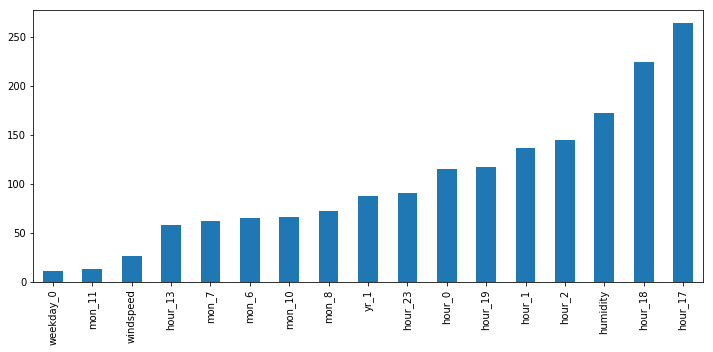

In [80]:
feature_importance = pd.Series(index = x_train_new.columns, data = np.abs(cv_model.coef_))
n_selected_features = (feature_importance>0).sum()
print('features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))
feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (12,5))

In [82]:
import shap
shap.initjs()

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [83]:
explainer = shap.LinearExplainer(linreg, x_train_new, feature_dependence="independent")
shap_values = explainer.shap_values(x_test_new)
x_test_array = np.array(x_test_new)
# we need to pass a dense version for the plotting functions

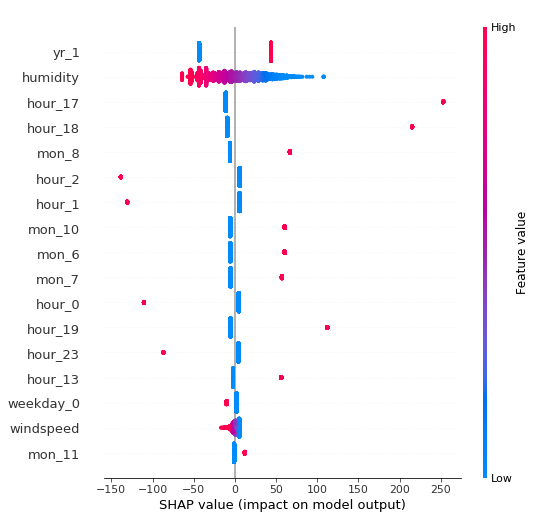

In [84]:
shap.summary_plot(shap_values, x_test_array, feature_names=x_test_new.columns)

In [85]:
r2_scores = cross_val_score(linreg, x_train_new, y_train, cv=10)
mse_scores = cross_val_score(linreg, x_train_new, y_train, cv=10,scoring='neg_mean_squared_error')

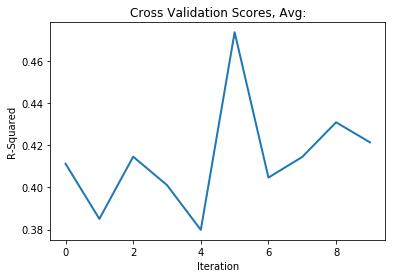

In [86]:
fig, ax = plt.subplots()
ax.plot([i for i in range(len(r2_scores))],r2_scores,lw=2)
ax.set_xlabel('Iteration')
ax.set_ylabel('R-Squared')
ax.title.set_text("Cross Validation Scores, Avg:".format(np.average(r2_scores)))
plt.show()

In [87]:
print("R-squared::{}".format(r2_scores))
print("MSE::{}".format(mse_scores))

R-squared::[0.41126064 0.38508751 0.41459602 0.40113744 0.37986334 0.473637
 0.40468835 0.41448594 0.43092083 0.42141619]
MSE::[-19455.99324486 -19084.39838735 -20312.23757482 -18083.15401054
 -19126.47777437 -18947.59508453 -21084.19044495 -18127.82234415
 -18907.94673986 -18763.17796176]


In [88]:
# Test Set Performance
# Get the predicted values for dependent variable
pred_y = linreg.predict(x_test_new)

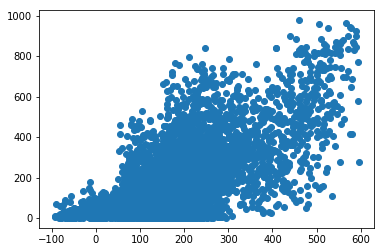

In [89]:
# Correlation between Actual and Preducted for the Test base
plt.scatter(pred_y,y_test)